### Imports

In [1]:
import numpy as np

import sympy as sym

import itertools

import pandas as pd

In [2]:
from operator import itemgetter

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 10

## Evolutionary simulations

**Set-up**

In [5]:
colors = {"reactive-one": "tab:orange", "reactive-two": "tab:green", "reactive-three": "tab:blue"}

colors_idx = ["tab:orange", "tab:green", "tab:blue"]

linestyles = ['-o', '--o', ':o']

labels = ['reactive-one', 'reactive-two', 'reactive-three']

**Data**

In [7]:
df = pd.read_csv("../prc_data/evolution_over_seeds_reactive.csv", index_col=0)

In [7]:
dists = []

In [8]:
groups = df[df['type'] == 'one'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2',
                                                               'frequencies']].values))
    
p1, p2, freqs1 = zip(*per_seed)

dists.append([p1, p2])

In [9]:
groups = df[df['type'] == 'two'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2', 'p_3', 'p_4',
                                                               'frequencies']].values))
    
p1, p2, p3, p4, freqs2 = zip(*per_seed)

dists.append([p1, p2, p3, p4])

In [10]:
groups = df[df['type'] == 'three'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2', 'p_3', 'p_4',
                                                               'p_5', 'p_6', 'p_7',
                                                                     'p_8',
                                                               'frequencies']].values))
    
p1, p2, p3, p4, p5, p6, p7, p8, freqs3 = zip(*per_seed)

dists.append([p1, p2, p3, p4, p5, p6, p7, p8])

In [11]:
dims = [2, 4, 8]

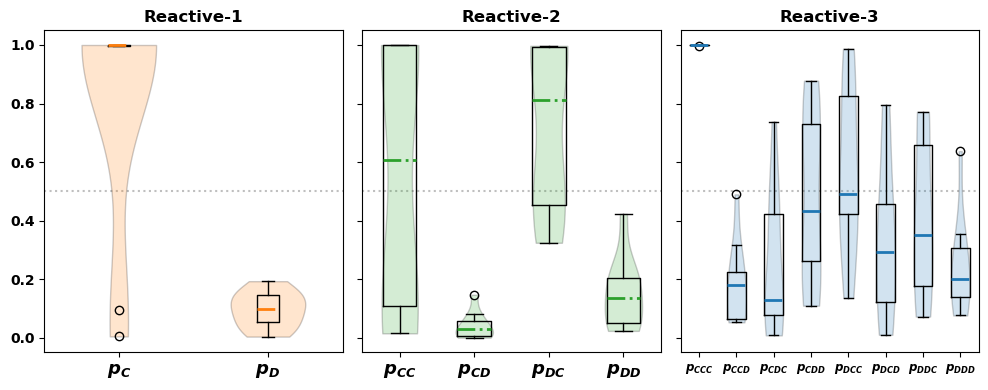

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

for i, dist in enumerate(dists):

    parts = axes[i].violinplot(dist, showextrema=False,
                            showmeans=False);

    boxes = axes[i].boxplot(dist)

    for pc in parts['bodies']:
        pc.set_facecolor(colors[labels[i]])
        pc.set_edgecolor('black')
        pc.set_alpha(.20)

    for bp in boxes['medians']:
        bp.set_color(colors[labels[i]])
        bp.set_linewidth(2)
        bp.set_linestyle('-.')
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(1)
        
# for i, freq in enumerate([freqs1, freqs2, freqs3]):
#     idx = np.argmax(freq)
#     points = [p[idx] for p in dists[i]]
    
#     axes[1, i].bar(range(1, len(points) + 1), points, color=colors[labels[i]])
        
axes[0].set_title("Reactive-1", fontsize=12, fontweight='bold')
axes[1].set_title("Reactive-2", fontsize=12, fontweight='bold')
axes[2].set_title("Reactive-3", fontsize=12, fontweight='bold')

# axes[1, 0].set_title("Most abundant strategy", fontsize=12, fontweight='bold')
# axes[1, 1].set_title("Most abundant strategy", fontsize=12, fontweight='bold')
# axes[1, 2].set_title("Most abundant strategy", fontsize=12, fontweight='bold')

# axes[1, 0].text(1.1, -.4, "Reactive-one", fontweight="bold", fontsize=12)
# axes[1, 1].text(1.6, -.4, "Reactive-two", fontweight="bold", fontsize=12)
# axes[1, 2].text(2.2, -.4, "Reactive-three", fontweight="bold", fontsize=12)



axes[0].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
axes[1].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
axes[2].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["$p_C$", "$p_D$"], rotation=0,
                          fontsize=13)
#     axes[i, 0].set_ylabel("cooperation probability")


axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["$p_{CC}$",
                            "$p_{CD}$",
                            "$p_{DC}$",
                            "$p_{DD}$"], rotation=0,
                          fontsize=13)

axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
axes[2].set_xticklabels(["$p_{CCC}$", 
                            "$p_{CCD}$", 
                            "$p_{CDC}$", 
                            "$p_{CDD}$", 
                            "$p_{DCC}$", 
                            "$p_{DCD}$", 
                            "$p_{DDC}$", 
                            "$p_{DDD}$"], rotation=0, fontsize=8.5)
    
fig.tight_layout();

fig.savefig("../figures/abundant_strategies.pdf", bbox_inches='tight')

**Data Counting**

In [13]:
colors = {"reactive-(counting)-one": "chocolate",
          "reactive-counting-two": "yellowgreen",
          "reactive-counting-three": "dodgerblue"}

colors_idx = ["chocolate", "yellowgreen", "dodgerblue"]

linestyles = ['-o', '--o', ':o']

labels = ['reactive-(counting)-one', 'reactive-counting-two', 'reactive-counting-three']

In [14]:
ones = df[df["type"] == 'one']

In [15]:
ones["type"] = 'reactive-(counting)-one'

/var/folders/19/1t7slkb13h578dr5bl_47kf80000gp/T/ipykernel_29318/820585082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones["type"] = 'reactive-(counting)-one'


In [16]:
df = pd.read_csv("../prc_data/evolution_over_seeds_reactive_counting.csv", index_col=0)

In [17]:
df = pd.concat([df, ones])

In [18]:
dists = []

In [19]:
groups = df[df['type'] == 'reactive-(counting)-one'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2',
                                                               'frequencies']].values))
    
r1, r0, freqs1 = zip(*per_seed)

dists.append([r1, r0])

In [20]:
groups = df[df['type'] == 'counting-two'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                                     'p_2',
                                                                     'p_4',
                                                               'frequencies']].values))
    
r2, r1, r0, freqs2 = zip(*per_seed)

dists.append([r2, r1, r0])

In [21]:
groups = df[df['type'] == 'counting-three'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                                     'p_2',
                                                                     'p_4',
                                                                     'p_8',
                                                               'frequencies']].values))
    
r3, r2, r1, r0, freqs3 = zip(*per_seed)

dists.append([r3, r2, r1, r0])

In [22]:
dims = [2, 4, 8]

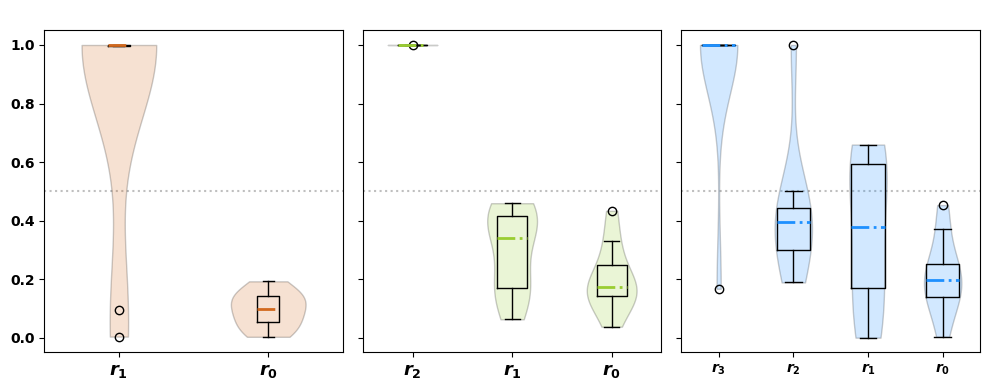

In [23]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

for i, dist in enumerate(dists):

    parts = axes[i].violinplot(dist, showextrema=False,
                            showmeans=False);

    boxes = axes[i].boxplot(dist)

    for pc in parts['bodies']:
        pc.set_facecolor(colors[labels[i]])
        pc.set_edgecolor('black')
        pc.set_alpha(.20)

    for bp in boxes['medians']:
        bp.set_color(colors[labels[i]])
        bp.set_linewidth(2)
        bp.set_linestyle('-.')
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(1)
        
axes[0].set_title("Reactive-1", fontsize=12, fontweight='bold', color='white')
axes[1].set_title("Reactive-2", fontsize=12, fontweight='bold', color='white')
axes[2].set_title("Reactive-3", fontsize=12, fontweight='bold', color='white')

axes[0].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
axes[1].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
axes[2].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["$r_1$", "$r_0$"], rotation=0,
                          fontsize=13)


axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels([
                            "$r_2$",
                            "$r_1$",
                            "$r_0$"], rotation=0,
                          fontsize=13)

axes[2].set_xticks([1, 2, 3, 4,])
axes[2].set_xticklabels(["$r_3$", 
                            "$r_2$", 
                            "$r_1$", 
                            "$r_0$",], rotation=0, fontsize=10)
    
# fig.suptitle("Counting Strategies", fontsize=13, fontweight='bold')
fig.tight_layout();

fig.savefig("../figures/abundant_strategies_counting.pdf", bbox_inches='tight')